<a href="https://colab.research.google.com/github/Absinthe31/SM2L_AMD_PROJECT/blob/master/amd_smml_glasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMD-SM2L Project


Here i download the kaggle dataset

In [ ]:
import json
!mkdir /root/.kaggle
data = {"username":"matteorusconi","key":"a35f0c20a32e43f38e49ac5a39570e8c"}
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(data, f)
!kaggle datasets download -d jeffheaton/glasses-or-no-glasses

and then unzip the dowloaded file

In [2]:
!unzip ./glasses-or-no-glasses.zip > /dev/null
!rm ./test.csv 
!mv ./train.csv ./train_old.csv 
!rm ./glasses-or-no-glasses.zip
!rm -rf ./sample_data

I install a library needed for network printing

In [ ]:
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!sudo pip install pygraphviz

In the following i import the dataset and partition it into train.csv and test.csv

In [4]:
import pandas as pd
dataset = pd.read_csv("./train_old.csv", index_col=0)

This part fixes the wrong labels in the dataset

In [5]:
wrong_list = [4450,4211,4216,4246,3552,861,1392,2619,1730,2315,1154,3388,404,1324,1330,1307,3124,2947,3614,2883,4036,1884,4122,2696,3572,1282,2115,2819,242,3481,1567,863,842,1239,1145,1078,1133,1791,1169,3059,1293,4158,4218,1784,3871,2875,4461,1876,366,1803,30,2726,4293,2145,2991,544,2664,181,1563,3108,45,1438,3354,2971,1945,3608,3178,3757,2786,3050,1922,1620,665,4231,778,1077,1418,797,836,3379,3523,3697,3630,1341,1390,4296,4436,964,715,953,409,954,2051,1308,1863,4372,522,2988,2295,3945,3214,31,3683,2129,4352,1537,210,1721,3740,4338,441,998,3551,1488,2691,2298,3510,2444,1903,2937,305,1907,951,3471,3908,1203,722,1644,2258,2820,3649,3611,1859,787,1852,4179,338,432,4272,723,2113,377,2901,2906,1148,1348,1054,4375,2431,4105,3060,3361,582,2142,940,1275,2260,866,3394,324,2853,945,2091,478,1993,2530,1279,3535,4278,151,2114,3802,2910,1810,673,349,1639,3628,3298,2679,3504,744,3344,2042,966,3040,120,4021,1707,3030,4155,195,1737,4017,2220,3360,4474,2896,58,4214,1961,381,2678,3055,1427,1132,3717,1236,3005,2275,976,3875,1048,2675,2359,2809,486,1782,2248,1987,680,2736,2338,1556,1284,605,527,272,494,637,1369,1359,491,3094,636,1128,2893,908,359,2771,4485,2200,2036,4120,4108,2339,2916,3984,782,437,524,3290,2256,3921,2286,4094,653,2629,699,928,3530,4124,3148,3072,2372,2703,999,3723,2498,1520,2121,1594,2396,2637,3662,85,89,71,1552,755,3305,796,2943,2177,882,3334,3753,3527,3769,3011,4357,2548,3542,3179,1708,3588,3892,3566,2149,3461,516,4142,98,1856,1131,629,3524,3165,3261,3609,1319,1507,2705,461,709,2914,3071,1497,2267,2917,3331,4052,3814,2137,1763,3335,1108,3051,2116,2541,1111,1180,613,2522,843,1349,1218,2411,1357,774,2016,3910,2572,1378,2837,3888,878,3472,497,1182,3933,1345,2731,2136,1015,1146,287,2992,1889,3091,3102,3109,3495,1268,3905,577,2603,1757,3603,3658,4080,684,2864,2192,1167,1242,2605,2646,3239,3834,2870,558,2556,3704,608,3211,1381,177,1902,1804,1318,4056,831,2165,4121,4348,2441,2621,1102,4023,3845,3884,1176,3363,1615,3127,4260,1075,2889,3213,3452,3878,2450,1681,538,3483,1101,4210,108,1956,106,1020,4401,119,2718,107,3190,1526,105,2161,2591,4493,3003,3186,1226,4170,2182,707,1252,2529,453,1793,3708,443,4362,4298,2094,2740,1565,996,2900,912,639,4403,2234,2575,2761,3384,2348,4349,3439,452,1220,762,3986,2676,3017,690,1574,1332,2792,3218,1199,411,2588,972,2753,2218,3255,4053,4228,3500,2540,2453,1613,3684,992,154,3518,2262,1887,748,1129,1401,1055,4286,1715,3209,2473,4079,1296,827,428,858,1411,3768,1573,3864,1196,644,2505,2977,1646,3929,3057,4275,2573,575,4411,2604,2027,2151,3317,3849,2663,521]

In [6]:
dataset = dataset.filter(items=("id","glasses"))

for row in wrong_list:
  if dataset[dataset.index == row]['glasses'].values[0] == 0:
    dataset.at[row, 'glasses'] = 1
  else:
    dataset.at[row, 'glasses'] = 0



In [7]:
train = dataset.head(4200)
test = dataset.tail(300)
train.to_csv("./train.csv", header=False)
test.to_csv("./test.csv", header=False)

In [8]:
!mkdir ./faces-spring-2020/faces-spring-2020-preprocessed

This is the filter that enhances brightness of glass over nose part

In [9]:
filter = (0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,7.600000000000000000e+01,2.550000000000000000e+02,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,2.300000000000000000e+01,7.600000000000000000e+01,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,8.000000000000000000e+00,1.900000000000000000e+01,2.600000000000000000e+01,2.600000000000000000e+01,1.900000000000000000e+01,8.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,7.300000000000000000e+01,1.710000000000000000e+02,2.290000000000000000e+02,2.290000000000000000e+02,1.710000000000000000e+02,7.300000000000000000e+01,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,8.100000000000000000e+01,1.900000000000000000e+02,2.550000000000000000e+02,2.550000000000000000e+02,1.900000000000000000e+02,8.100000000000000000e+01,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,8.100000000000000000e+01,1.900000000000000000e+02,2.550000000000000000e+02,2.550000000000000000e+02,1.900000000000000000e+02,8.100000000000000000e+01,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,8.100000000000000000e+01,1.900000000000000000e+02,2.550000000000000000e+02,2.550000000000000000e+02,1.900000000000000000e+02,8.100000000000000000e+01,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,7.300000000000000000e+01,1.710000000000000000e+02,2.290000000000000000e+02,2.290000000000000000e+02,1.710000000000000000e+02,7.300000000000000000e+01,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,8.000000000000000000e+00,1.900000000000000000e+01,2.600000000000000000e+01,2.600000000000000000e+01,1.900000000000000000e+01,8.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00)


This is the *preprocess-script.py* part

In [10]:
import cv2
import numpy as np
import math

def fixList(list):
    newlist = []
    for item in list:
        for pixel in item:
            newlist.append(pixel)
    return newlist

def detectWhite(value, filter, threshold):
    if (value >= threshold) and (filter >= threshold):
        return 1
    else:
        result = (value**3) 
    return result if (result <= 1) else 1

minibatch_size = 500
res = 50


filter = [30 if (pixel == 0) else pixel for pixel in filter]
filter = [pixel/255 for pixel in filter]


for i in range(math.ceil(4500 / minibatch_size)):
    for j in range(i * minibatch_size, (i + 1) * minibatch_size):
        img = cv2.imread(f"./faces-spring-2020/faces-spring-2020/face-{j + 1}.png")

        try:
                img = cv2.resize(img, (res, res))
        except Exception:
                continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.bitwise_not(img)
        img = fixList(img)
        img = [pixel/255 for pixel in img]

        new_image = np.ndarray((res,res))

        x = 0
        for a in range(res):
            for b in range(res):
                new_image[a][b] = detectWhite(img[x], filter[x], 0.9)*255
                x += 1

        new_image = new_image.astype(np.uint8)
        crop_image = new_image[18:28, 8:42]
        crop_image = fixList(crop_image)
        crop_image = [pixel/255 for pixel in crop_image]
        crop_image = np.array(crop_image)
        crop_image = (crop_image - crop_image.mean()) / crop_image.std()

        np.savetxt(f"./faces-spring-2020/faces-spring-2020-preprocessed/face-{j + 1}", crop_image)



In [11]:
import PIL
import time
import copy
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import random
import csv
from PIL import Image

This is the main class which implements the neural network algorithm

In [12]:
class NeuralNetwork:

    def __init__(self, networkStructure):

        # nn è la strutture dati fondamentale della rete, è una matrice suddivisa per layers, neurons, activations e weights
        self.nn = []
        # alpha è il coefficiente della leaky reLU function
        self.alpha = 10 ** (-2)

        self.dataset_size = 0

        self.learning_rate = 0.01
        
        self.res = 50

        # questo ciclo crea la struttura dati della rete, e inizializza i weights a valori casuali, mentre le activations a 1
        for i in range(len(networkStructure)):
            self.nn.append([])
            for j in range(networkStructure[i]):
                if (i < len(networkStructure) - 1):
                    self.nn[i].append([])
                    self.nn[i][j].append([1, 0 if i != 0 else self.randomNum()])
                    self.nn[i][j].append([self.randomNum() for x in range(networkStructure[i + 1])])
                else:
                    self.nn[i].append([])
                    self.nn[i][j].append([1, 0])

    # questa funzione prende la matrice nn e la trasforma in una matrice di adiacenza del grafo della rete
    def toAdjMatrix(self, nn):

        adjMatrix = [[0] * self.totNeurons() for i in range(self.totNeurons())]

        sumLayer1 = 0

        for a in range(len(nn) - 1):
            sumLayer2 = sumLayer1
            sumLayer1 = sumLayer1 + len(nn[a])
            for b in range(len(nn[a])):
                for d in range(len(nn[a][b][1])):
                    adjMatrix[sumLayer2 + b][sumLayer1 + d] = nn[a][b][1][d]

        return adjMatrix

    # questa funzione stampa nel file network.png la attuale strutture della rete, usando networkx
    def print(self):

        # prendo il massimo act e il massimo weigth per normalizzare i valori tra 1 e 2,
        # la normalizzazione serve per avere una buona stampa della rete mediante networkx

        # normalizzo i valori dei weights in scala con il primo layer, per avere un disegno della rete più bello dopo il training
        new_nn = copy.deepcopy(self.nn)

        self.bool = True
        for neuron in new_nn[0]:
            if neuron[0][0] != 0:
                self.bool = False
                break

        max_act = 1
        min_act = 0

        for layer in new_nn[:-1]:
            min_act_l = layer[0][0][0]
            max_act_l = 0

            for neuron in layer:
                act = neuron[0][0]
                if act > max_act_l:
                    max_act_l = act
                if act < min_act_l:
                    min_act_l = act

            for neuron in layer:
                try:
                    neuron[0][0] = min_act + ((max_act - min_act) / (max_act_l - min_act_l)) * (
                                neuron[0][0] - min_act_l)
                except ZeroDivisionError:
                    neuron[0][0] = 0

            if self.bool:
                for neuron in new_nn[len(new_nn) - 1]:
                    neuron[0][0] = 0

        self.edge_max = 0
        self.act_max = 0
        for layer in new_nn:
            for neuron in layer:
                act = neuron[0][0]
                if (act > self.act_max):
                    self.act_max = act
                try:
                    weights = neuron[1]
                    max_weight = max(weights)
                    if (max_weight > self.edge_max):
                        self.edge_max = max_weight
                except IndexError:
                    pass

        max_weight_first_layer = 0
        min_weight_first_layer = new_nn[0][0][1][0]

        for neuron in new_nn[0]:
            for edge in neuron[1]:
                if edge > max_weight_first_layer:
                    max_weight_first_layer = edge
                if edge < min_weight_first_layer:
                    min_weight_first_layer = edge

        for layer in new_nn[1:-1]:
            max_weight_generic = 0
            min_weight_generic = layer[0][1][0]
            for neuron in layer:
                for edge in neuron[1]:
                    if edge > max_weight_generic:
                        max_weight_generic = edge
                    if edge < min_weight_generic:
                        min_weight_generic = edge
            for neuron in layer:
                for edge in range(len(neuron[1])):
                    neuron[1][edge] = min_weight_first_layer + ((max_weight_first_layer - min_weight_first_layer) / (
                                max_weight_generic - min_weight_generic)) * (neuron[1][edge] - min_weight_generic)

        # una volta che ho il massimo act e il massimo weight li utilizzo per normalizzare una nuova matrice, in modo da non alterare
        # i valori all'interno della matrice effettiva che memorizza la rete
        new_matrix = self.toAdjMatrix(new_nn)
        for i in range(len(new_matrix)):
            for j in range(len(new_matrix[i])):
                if (new_matrix[i][j] != 0):
                    new_matrix[i][j] = self.normalizationFunction(self.edge_max, new_matrix[i][j])

        # stampo la rete utilizzando networkx
        matrix = np.matrix(new_matrix)
        graph = self.from_numpy_matrix(matrix)
        edges, edge_weights = zip(*nx.get_edge_attributes(graph, 'weight').items())
        acts = self.getActivations(new_nn)
        acts = [self.normalizationFunction(self.act_max, act) for act in acts]
        #print("Nodes:\n", acts)
        #print("Edges:\n", edge_weights)
        pos = graphviz_layout(graph, prog='dot', args="-Grankdir=LR -Gordering=in")
        nx.draw(graph, pos, node_color=acts, nodelist=graph.nodes(), edgelist=edges, edge_color=edge_weights,
                edge_cmap=plt.cm.Blues, cmap=plt.cm.Wistia)
        plt.savefig("network.png")

    # questa funzione ritorna il numero totale di neuroni
    def totNeurons(self):
        totNeurons = 0
        for layer in self.nn:
            for neuron in layer:
                totNeurons += 1

        return totNeurons

    # questa funzione stampa su stdout una matrice in modo più leggibile
    def printMatrix(self, matrix):
        for row in matrix:
            print(row)

    # questa funzione ritorna un numero casuale definito nell'intervallo
    def randomNum(self):
        return np.random.normal(loc=0.0, scale=0.35) 

    # questa funzione stampa la matrice di adiacenza della rete
    def printAdjMatrix(self):
        self.printMatrix(self.toAdjMatrix(self.nn))

    # questa funzione restituisce un vettore con tutti gli acts
    def getActivations(self, nn):

        acts = []

        for i in range(len(nn)):
            for j in range(len(nn[i])):
                acts.append(nn[i][j][0][0])

        return acts

    # questa funzione si occupa di propagare il segnale lungo la rete
    def evaluateNetwork(self):

        last_layer = len(self.nn) - 1

        for i in range(len(self.nn)):
            if ((i > 0) and (i < last_layer)):
                for j in range(len(self.nn[i])):
                    sum = self.weightedSum(i, j)
                    self.nn[i][j][0][0] = self.reluFunction(sum)
                    self.nn[i][j][0][1] = sum
            elif (i == last_layer):
                sums = []
                for j in range(len(self.nn[i])):
                    sums.append(self.weightedSum(i, j))

            #print(self.nn[i])
            #time.sleep(2)

        for neuron in range(len(self.nn[last_layer])):
            smax = self.softmaxFunction(sums)
            self.nn[last_layer][neuron][0][0] = smax[neuron]
            self.nn[last_layer][neuron][0][1] = sums[neuron]


    #questa funzione imposta l'input alla rete    
    def setInput(self, input):

        i = 0
        for neuron in self.nn[0]:
            neuron[0][0] = input[i]
            i += 1
    #questa funzione serve per normalizzare, sempre per migliorare la print()
    def normalizationFunction(self, max, input):
        try:
            value = input / max

            if (value >= 1):
                value -= 0.0001
            if (value <= 0):
                value += 0.0001

            return value + 1
        except ZeroDivisionError:
            return 1
    
    #questa funzione implementa la leaky relu
    def reluFunction(self, input):
        return self.alpha * input if (input < 0) else input

    #questa funzione implementa la softmax
    def softmaxFunction(self, input):
        sum = 0
        for value in input:
            sum += math.e ** value
        return [(math.e ** value) / sum for value in input]
    
    #questa funzione calcola la somma pesata di attivazioni, fondamentale per la propagazione del segnale
    def weightedSum(self, layer, neuron):
        sum = 0
        for i in range(len(self.nn[layer - 1])):
            sum += self.nn[layer - 1][i][0][0] * self.nn[layer - 1][i][1][neuron]
        return sum

    #questa funzione serve per la print()
    def from_numpy_matrix(self, matrix):

        old_g = nx.from_numpy_matrix(matrix, create_using=nx.DiGraph)
        nodes = old_g.nodes()
        edges, edge_weights = zip(*nx.get_edge_attributes(old_g, 'weight').items())

        edges_and_weights = self.mergeLists(edges, edge_weights)

        g = nx.DiGraph()
        for node in nodes:
            g.add_node(node)
        g.add_weighted_edges_from(edges_and_weights)

        return g

    #questa semplice funzione unisce due liste, serve per la print()
    def mergeLists(self, tuplex, listx):

        newlist = []
        for i in range(len(tuplex)):
            l = list(tuplex[i])
            l.append(listx[i])
            newlist.append(tuple(l))
        return newlist

    #le seguenti 6 funzioni sono dei setter per gli input e le labels
    
    def setTrainingLabels(self, labels):
        self.training_labels = labels

    def setTrainingInputs(self, inputs):
        self.training_inputs = inputs

    def setTrainingExample(self, example):
        self.training_example = example
        self.setTrainingInputs(self.training_example[0])
        self.setTrainingLabels(self.training_example[1])

    def setTestLabels(self, labels):
        self.test_labels = labels

    def setTestInputs(self, inputs):
        self.test_inputs = inputs

    def setTestExample(self, example):
        self.test_example = example
        self.setTestInputs(self.test_example[0])
        self.setTestLabels(self.test_example[1])

        
    #questa funzione implementa la backpropagation
    def backpropagate(self, label):

        learning_rate = 0.005

        deltas = []
        delta = 0

        i = 0
        for layer in range(len(self.nn)):
            deltas.append([])
            for neuron in range(len(self.nn[layer])):
                deltas[i].append(0)
            i += 1

        for layer in range(len(self.nn) - 1, 0, -1):
            # calcolare i delta per ogni neurone
            for neuron in range(len(self.nn[layer])):
                if (layer == len(self.nn) - 1):

                    delta = self.derSquareLossFunction(self.nn[layer][neuron][0][0] - 1, label[neuron]) \
                            * self.derReluFunction(self.weightedSum(layer, neuron))
                else:
                    sum = 0
                    for k in range(len(self.nn[layer + 1])):
                        sum += deltas[layer + 1][k] * self.nn[layer][neuron][1][k]
                    sum *= self.derReluFunction(self.weightedSum(layer, neuron))
                    delta = sum

                deltas[layer][neuron] = delta

        for layer in range(len(self.nn) - 1):
            for neuron in range(len(self.nn[layer])):
                for edge in range(len(self.nn[layer][neuron][1])):
                    adj = learning_rate * deltas[layer + 1][edge] * self.nn[layer][neuron][0][0]
                    self.nn[layer][neuron][1][edge] -= adj

    #questa funzione implementa la backpropagation con l'utilizzo dei mini-batch
    def minibatchedBackpropagate(self, minibatch, labels):

        learning_rate = self.learning_rate
        minibatch_size = len(minibatch)

        deltas = []
        delta = 0

        for j in range(minibatch_size):
            deltas.append([])
            i = 0
            for layer in range(len(self.nn)):
                deltas[j].append([])
                for neuron in range(len(self.nn[layer])):
                    deltas[j][i].append(0)
                i += 1

        for n_minibatch in range(minibatch_size):

            # print(f"- {n_minibatch+1}")
            self.setInput(minibatch[n_minibatch])
            # print("input set")
            self.evaluateNetwork()
            # print("network evaluated")

            for layer in range(len(self.nn) - 1, 0, -1):
                # print("layer0", layer)
                # calcolare i delta per ogni neurone
                for neuron in range(len(self.nn[layer])):
                    # print("neuron", neuron)
                    if (layer == len(self.nn) - 1):
                        # gradiente della softmax + logloss
                        delta = self.nn[layer][neuron][0][0] - labels[n_minibatch][neuron]
                    else:
                        
                        sumx = 0
                        
                        for k in range(len(self.nn[layer + 1])):
                            sumx += deltas[n_minibatch][layer + 1][k] * self.nn[layer][neuron][1][k]
                        
                        sumx *= self.derReluFunction(self.nn[layer][neuron][0][1])
                        delta = sumx

                    deltas[n_minibatch][layer][neuron] = delta

        for layer in range(len(self.nn) - 1):
            for neuron in range(len(self.nn[layer])):
                for edge in range(len(self.nn[layer][neuron][1])):
                    adj = 0
                    for n_minibatch in range(minibatch_size):
                        adj += deltas[n_minibatch][layer + 1][edge] * self.nn[layer][neuron][0][0]

                    adj = learning_rate * (1 / minibatch_size) * adj

                    self.nn[layer][neuron][1][edge] -= adj

    #questa funzione implementa la square loss (non utilizzata)
    def derSquareLossFunction(self, input, label):
        return 2 * (input - label)

    #questa funzione implementa la derivata della leaky relu
    def derReluFunction(self, input):
        return self.alpha if (input < 0) else 1

    #questa funzione effettua un epoch
    def train(self):

        for input in range(len(self.training_inputs)):
            self.setInput(self.training_inputs[input])
            self.evaluateNetwork()
            self.backpropagate(self.training_labels[input])

            # time.sleep(3)
            # self.print()
            
            
    #questa funzione effettua un epoch, da usare se si vuole dividere in mini-batch
    def minibatchedTrain(self, minibatch_size):

        #print("Training...")

        self.minibatch_size = minibatch_size

        with open('train.csv', 'r') as f:
            reader = csv.reader(f)
            training_labels = list(reader)


        for i in range(math.ceil((self.dataset_size) / minibatch_size)):

            #print("Training on minibatch n°", i + 1)

            minibatch = []
            labels = []

            for j in range(i * minibatch_size, (i + 1) * minibatch_size):
                
                try:
                    img = np.loadtxt(f"{self.data_path}/face-{j + 1}")
                except Exception:
                    continue
                
                
                minibatch.append(img)

                try:
                    label = int(training_labels[j][1])
                except Exception:
                    continue


                labels.append((label, 0 if (label == 1) else 1))

            
           
            self.minibatchedBackpropagate(minibatch, labels)

        #print("Training done")

    #questa funzione calcola il training error
    def trainingError(self):

        count = 0

        for input in range(len(self.training_inputs)):
            self.setInput(self.training_inputs[input])
            self.evaluateNetwork()

            if tuple([output[0][0] for output in self.nn[len(self.nn) - 1]]) == self.training_labels[input]:
                count += 1

        error = (1 - count / len(self.training_inputs)) * 100

        print(f"Training error is: {error}%")

    #questa funzione calcola il test error
    def testError(self):

        count = 0

        for input in range(len(self.test_inputs)):
            self.setInput(self.test_inputs[input])
            self.evaluateNetwork()
            if tuple([output[0][0] for output in self.nn[len(self.nn) - 1]]) == self.test_labels[input]:
                count += 1

        error = (1 - count / len(self.test_inputs)) * 100

        print(f"Test error is: {error}%")

    #questa funzione setta il percorso al dataset
    def setDatasetPath(self, path):

        self.data_path = path

    #questa funzione trasforma la matrice di una foto in un vettore
    def fixList(self, list):

        newlist = []

        for item in list:
            for pixel in item:
                newlist.append(pixel)

        return newlist

    #questa funzione calcola il training error usando i mini-batch
    def minibatchedTrainingError(self):

        #print("Calculating training error..")

        count = 0

        with open('train.csv', 'r') as f:
            reader = csv.reader(f)
            training_labels = list(reader)

        for i in range(math.ceil((self.dataset_size) / self.minibatch_size)):

            minibatch = []
            labels = []

            for j in range(i * self.minibatch_size, (i + 1) * self.minibatch_size):

                try:
                    img = np.loadtxt(f"{self.data_path}/face-{j + 1}")
                except Exception:
                    continue                
                
                
                minibatch.append(img)

                try:
                    label = int(training_labels[j][1])
                except Exception:
                    print("che succede?")
                    continue
                labels.append((label, 0 if (label == 1) else 1))

            for input in range(len(minibatch)):
                self.setInput(minibatch[input])
                self.evaluateNetwork()

                l = [output[0][0] for output in self.nn[len(self.nn) - 1]]
                if l[0] >= l[1]:
                    l = (1, 0)
                else:
                    l = (0, 1)

                #print(l)
                #print(labels[input])
                #print()

                if tuple(l) == labels[input]:
                    count += 1

        error = (1 - count / self.dataset_size) * 100

        #print(f"Training error is: {error}%")

        return error

    #questa funzione calcola il test error usando i mini-batch
    def minibatchedTestError(self):

        #print("Calculating test error..")

        count = 0

        with open('test.csv', 'r') as f:
            reader = csv.reader(f)
            test_labels = list(reader)

        for i in range(math.ceil(300 / self.minibatch_size)):

            minibatch = []
            labels = []

            for j in range(i * self.minibatch_size, (i + 1) * self.minibatch_size):

                
                try:
                    
                    img = np.loadtxt(f"{self.data_path}/face-{j + 4201}")
                    
                except Exception:
                    continue
                    
                minibatch.append(img)

                try:
                    label = int(test_labels[j][1])
                except Exception:
                    continue
                labels.append((label, 0 if (label == 1) else 1))

            for input in range(len(minibatch)):
                self.setInput(minibatch[input])
                self.evaluateNetwork()

                l = [output[0][0] for output in self.nn[len(self.nn) - 1]]
                if l[0] >= l[1]:
                    l = (1, 0)
                else:
                    l = (0, 1)

                #print(l)
                #print(labels[input])
                #print()

                if tuple(l) == labels[input]:
                    count += 1

        error = (1 - count / 300) * 100

        #print(f"Test error is: {error}%")

        return error

    #questa funzione ritorna l'attivazione del primo neurone nell'ultimo layer
    def networkOutput(self):
        return self.nn[len(self.nn) - 1][0][0][0]


    #questa funzione applica un filtro, (usata nello script di preprocessing)
    def detectWhite(self, value, filter, threshold):
        
      if((value >= threshold) and (filter >= threshold)):
        return 1
      else:
        result = (value**3) 
        return result if (result <= 1) else 1
    
    #questa funzione imposta la grandezza del dataset
    def setDatasetSize(self, size):
        self.dataset_size = size

    #questa funzione testa una figura casuale dal test set
    def testRandomPic(self):
                
        n = random.randrange(4201,4500) 
            
        imgx = cv2.imread(f"faces-spring-2020/faces-spring-2020/face-{n}.png")

        print("Image n°", n)
        
        plt.imshow(imgx[:, :, ::-1])
        plt.show()
    
        img = np.loadtxt(f"{nn.data_path}/face-{n}")
    
        nn.setInput(img)
        nn.evaluateNetwork()
        print("Prediction: glasses" if nn.networkOutput() >= 0.5 else "Prediction: no glasses")

        if(n >= 4201):
            with open('test.csv', 'r') as f:
                reader = csv.reader(f)
                test_labels = list(reader)
            label = int(test_labels[n-4201][1])
        else:
            with open('train.csv', 'r') as f:
                reader = csv.reader(f)
                train_labels = list(reader)
            label = int(train_labels[n-1][1])            
        
        
        print("Label: glasses" if label == 1 else "Label: no glasses")
        
        
    def testRandomPics(self,k):
        
        for i in range(k):
            self.testRandomPic()
            print("")

    def trainNetwork(self, epochs, l_rate, l_decay, minib_size):
            
        self.learning_rate = l_rate
                        
        print("Training started..")
        print()
            
        i = 1
        
        test_error = 10
        
        min_test_error = 100
            
        while(i < epochs + 1):
                
            if(i == 1):
                start_time = time.time()
                    
            print("Epoch n°", i)
                
            self.minibatchedTrain(minib_size)
                
            test_error = self.minibatchedTestError()
            
            if(test_error < min_test_error):
                min_test_error = test_error
                min_epoch = i
                best_nn = copy.deepcopy(self.nn)
                min_training_error = nn.minibatchedTrainingError()
                
            if(i == 1):
                print(f"Average epoch time is {format((time.time() - start_time)/60,'.2f')} minutes")
                print(f"Estimated time await is {format((time.time() - start_time)/60*epochs,'.2f')} minutes")
            i += 1
                
            self.learning_rate -= (l_decay * self.learning_rate)

                
        print()

        print("Training done")
        print()
            
        print("Training error is", self.minibatchedTrainingError(), "%")
            
        print("Test error is ", test_error, "%")
        
        print()
        
        print("Best epoch was epoch ", min_epoch, " , with:")
        print("Training error: ", min_training_error, "%")
        print("Test error: ", min_test_error, "%")
        
        self.nn = best_nn

            

This is the network initialization

In [13]:
np.seterr("raise")
nn = NeuralNetwork((340, 10, 5, 2))
nn.setDatasetSize(4200)
nn.setDatasetPath("faces-spring-2020/faces-spring-2020-preprocessed")

Here are executed some experiments

In [14]:
nn.trainNetwork(10, 0.03, 1/10, 1) #(epochs, learning_rate, learning_rate_decay, minibatch_size)

Training started..

Epoch n° 1
Average epoch time is 0.91 minutes
Estimated time await is 9.10 minutes
Epoch n° 2
Epoch n° 3
Epoch n° 4
Epoch n° 5
Epoch n° 6
Epoch n° 7
Epoch n° 8
Epoch n° 9
Epoch n° 10

Training done

Training error is 1.7857142857142905 %
Test error is  1.6666666666666718 %

Best epoch was epoch  5  , with:
Training error:  2.3095238095238058 %
Test error:  1.0000000000000009 %


Image n° 4346


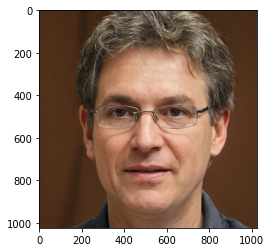

Prediction: glasses
Label: glasses

Image n° 4292


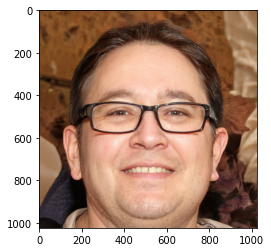

Prediction: glasses
Label: glasses

Image n° 4379


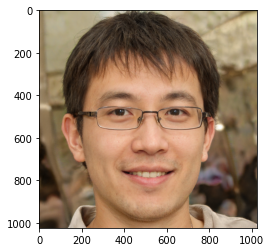

Prediction: glasses
Label: glasses

Image n° 4392


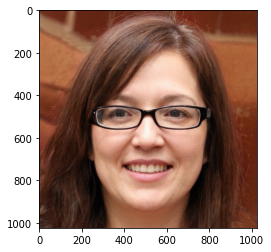

Prediction: glasses
Label: glasses

Image n° 4281


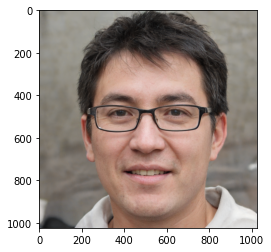

Prediction: glasses
Label: glasses

Image n° 4371


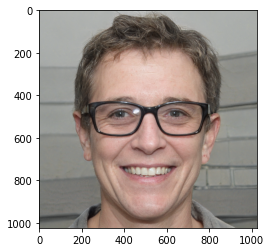

Prediction: glasses
Label: glasses

Image n° 4259


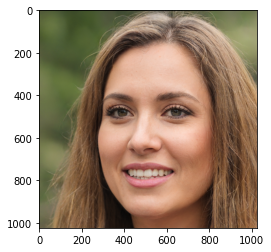

Prediction: no glasses
Label: no glasses

Image n° 4380


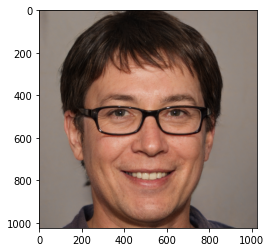

Prediction: glasses
Label: glasses

Image n° 4406


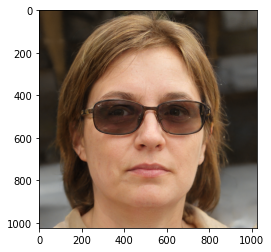

Prediction: glasses
Label: glasses

Image n° 4338


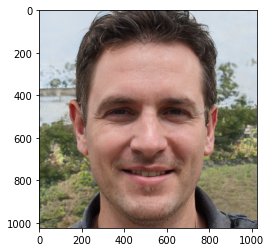

Prediction: no glasses
Label: no glasses



In [17]:
nn.testRandomPics(10)

In [19]:
nn = NeuralNetwork((340, 10, 5, 2))
nn.setDatasetSize(4200)
nn.setDatasetPath("faces-spring-2020/faces-spring-2020-preprocessed")
nn.trainNetwork(20, 0.001, 1/30, 1) #(epochs, learning_rate, learning_rate_decay, minibatch_size)

Training started..

Epoch n° 1
Average epoch time is 0.98 minutes
Estimated time await is 19.57 minutes
Epoch n° 2
Epoch n° 3
Epoch n° 4
Epoch n° 5
Epoch n° 6
Epoch n° 7
Epoch n° 8
Epoch n° 9
Epoch n° 10
Epoch n° 11
Epoch n° 12
Epoch n° 13
Epoch n° 14
Epoch n° 15
Epoch n° 16
Epoch n° 17
Epoch n° 18
Epoch n° 19
Epoch n° 20

Training done

Training error is 3.6190476190476217 %
Test error is  4.333333333333334 %

Best epoch was epoch  7  , with:
Training error:  5.119047619047623 %
Test error:  4.333333333333334 %
